<a href="https://colab.research.google.com/github/PedroConst/EQE-002-Otimizacao/blob/main/Exemplos/Programacao_Quadratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gekko

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

#Programação Quadrática (Quadratic Programming)

Um fabricante de carros quer minimizar o peso de um carro mantendo um requisito mínimo de resistência. O peso do carro é modelado como uma função quadrática da espessura dos componentes da estrutura do carro. A resistência do carro é modelada como uma função linear da espessura dos componentes da estrutura do carro. O fabricante quer minimizar o peso do carro mantendo um requisito mínimo de resistência. Este problema é formulado como:

Minimizar $\frac{1}{2} x^T Q x + p x$

Sujeito a:

$G , x >= h$

onde x é a espessura dos componentes da estrutura do carro, Q é a matriz de coeficientes de peso quadrático, p é o vetor de coeficientes de peso linear, G é a matriz de coeficientes de resistência e h é o vetor de restrição de resistência.

In [ ]:
# Dados do Problema

# Coeficientes de Pesos Quadráticos
Q = np.array([[1, 0], [0, 2]])

# Coeficientes de Pesos Lineares
p = np.array([1, 2])

# Coeficientes de Resistência
G = np.array([[1, 1], [1, 2], [2, 1]])

# Restrição de Resistência
h = np.array([3, 4, 5])

# Chute Inicial
x0 = np.array([0, 0])

Programação Quadrática com Gekko
O código a seguir mostra como usar programação quadrática em gekko. Mude para `remote=False` para resolver localmente em vez de usar o servidor de computação público. O servidor público tem opções adicionais de solução.

<img align=left width=200px src='https://apmonitor.com/wiki/uploads/Main/gekko.png'>

In [ ]:
# Criar o Modelo
m = GEKKO(remote=False)

# Definir as Variáveis de Decisão
x = m.Array(m.Var,2,lb=0,ub=10)

# Definir a Função Objetivo
m.Minimize(0.5 * x@Q@x + p@x)

# Definir as Restrições
gx = G@x
m.Equations([gx[i]>=h[i] for i in range(len(h))])

# Resolver Otimização
m.solve(disp=False)

# Imprimir os Resultados
print(f'Optimal solution: x = {x}')
print(f'Minimum weight = {m.options.objfcnval}')

Optimal solution: x = [[2.0] [1.0]]
Minimum weight = 7.0


✅ Atividade: Resolver o Problema de Programação Quadrática (QP)


$\begin{align}\mathrm{maximize} \quad & \frac{1}{2} \left(x^2+y^2\right) -2x+2y \\ \mathrm{subject\;to}\quad & 6x+4y\le24 \\ & x+2y\le6 \\ &-x+y\le1 \\ & 0\le y\le2 \\ & x\ge0 \end{align}$

Utilize o `gekko` para resolver o problema de programação quadrática (QP) e reporte os resultados para `x`, `y` e o valor da função objetivo.

In [ ]:
# Criar o Modelo
m = GEKKO(remote=False)

# Definir Variáveis de Decisão
x,y = m.Array(m.Var,2,lb=0)

# Definir a Função Objetivo
m.Maximize(0.5*(x**2+y**2)-2*x+2*y)

# Definir as Restrições
m.Equations([6*x+4*y<=24,
             x+2*y<=6,
             -x+y<=1,y<=2])

# Resolver
m.solve(disp=False)

# Imprimir o Resultado
xopt = x.value[0]; yopt = y.value[0]
print('x:', xopt,'y:', yopt,'obj:',-m.options.objfcnval)

x: 2.0 y: 2.0 obj: 4.0


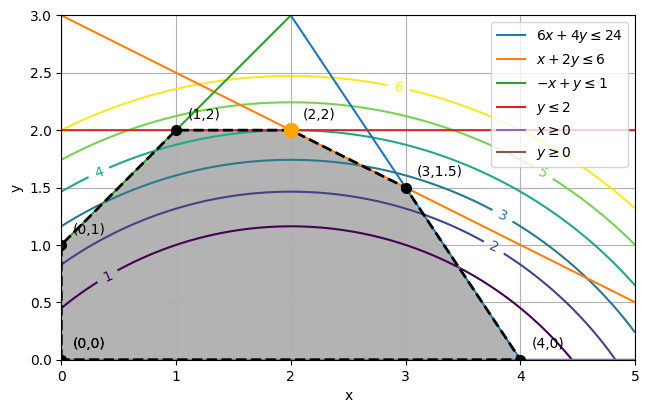

In [ ]:
# Definir Pontos da Função Objetivo
g = np.linspace(0,5,200)
x,y = np.meshgrid(g,g)
obj = 0.5*(x**2+y**2)-2*x+2*y

# Plotar Curvas de Contorno da Função Objetivo
CS = plt.contour(x,y,obj,np.arange(1,7))
plt.clabel(CS, inline=1, fontsize=10)

# Definir Curvas de Restrições
x0 = np.linspace(0, 5, 2000)
y0 = 6-1.5*x0   # 6*x+4*y<=24
y1 = 3-0.5*x0   # x+2*y<=6
y2 = 1+x0       # -x+y<=1
y3 = (x0*0) + 2 # y <= 2
y4 = x0*0       # x >= 0

# Plotar Curvas de Restrições
plt.plot(x0, y0, label=r'$6x+4y\leq24$')
plt.plot(x0, y1, label=r'$x+2y\leq6$')
plt.plot(x0, y2, label=r'$-x+y\leq1$')
plt.plot(x0, 2*np.ones_like(x0), label=r'$y\leq2$')
plt.plot(x0, y4, label=r'$x\geq0$')
plt.plot([0,0],[0,3], label=r'$y\geq0$')

# Sombrear a Região Viável
plt.imshow(((6*x+4*y<=24)&(x+2*y<=6)&(-x+y<=1)&(y<=2)&(x>=0)&(y>=0)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);

# Marcar Vértices da Região de Confiança
xv = [0,0,1,2,3,4,0]; yv = [0,1,2,2,1.5,0,0]
plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)

for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')

# Marcar o Ponto Ótimo
plt.plot([xopt],[yopt],marker='o',color='orange',markersize=10)

# Ajeitar eixos e aparência
plt.xlim(0,5); plt.ylim(0,3); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x'); plt.ylabel('y')
plt.show()